<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
# DataFrame: 表格    Series: 一行/一列   (.apply 差異)
df = pd.DataFrame(boston["data"],
      columns=boston["feature_names"])
# df["ans"] = -1 全部欄位變-1
df["ans"] = boston["target"]
df.to_csv("boston.csv", encoding="utf-8", index=False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [101]:
df.drop(["ans"], axis=1) #原表格不會被破壞, 詳細可以查 DataFrame.Drop()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [102]:
# sklearn前:用pandas.DataFrame (split後會空行列之類的)
# sklearn後:用np.array
import numpy as np
from sklearn.model_selection import train_test_split
# x,y =df.drop(["ans"], axis=1), df["ans"] #上面的意思
x,y =np.array(df.drop(["ans"], axis=1)), np.array(df["ans"])

# 90%x, 10%x, 90%y, 10%y
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,
    test_size=0.1) # 如果加 random_state 會產生隨機固定結果
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
y_test

(455, 13)
(51, 13)
(455,)
(51,)


array([10.4, 16.8, 18.6, 13.5, 28.6, 24.7, 23.4, 20.7, 20.2, 13.1, 22.5,
       18.4, 26.6, 36.2, 30.1, 22.5, 27.9, 22.2, 15.4,  8.5, 11.7, 14.1,
       14.4, 24.7, 17.9, 25. , 18.7, 25. , 11. , 21.4, 24.2, 18.2, 21.7,
       12.7, 22.7, 20.6, 16.7, 14.5, 24.6, 18. , 33.2, 15.2, 10.8, 10.5,
       36.5, 14.9, 21.1,  7.5, 28.1, 23.2, 34.9])

In [103]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(279.0, 475.65000000000003, 'RM <= 6.825\nmse = 87.718\nsamples = 455\nvalue = 22.786'),
 Text(139.5, 339.75, 'LSTAT <= 14.4\nmse = 39.738\nsamples = 373\nvalue = 19.808'),
 Text(69.75, 203.85000000000002, 'DIS <= 1.385\nmse = 26.815\nsamples = 221\nvalue = 23.145'),
 Text(34.875, 67.94999999999999, '\n  (...)  \n'),
 Text(104.625, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 203.85000000000002, 'CRIM <= 7.465\nmse = 18.799\nsamples = 152\nvalue = 14.957'),
 Text(174.375, 67.94999999999999, '\n  (...)  \n'),
 Text(244.125, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 339.75, 'RM <= 7.437\nmse = 82.185\nsamples = 82\nvalue = 36.33'),
 Text(348.75, 203.85000000000002, 'NOX <= 0.659\nmse = 38.555\nsamples = 52\nvalue = 31.273'),
 Text(313.875, 67.94999999999999, '\n  (...)  \n'),
 Text(383.625, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 203.85000000000002, 'CRIM <= 2.742\nmse = 36.628\nsamples = 30\nvalue = 45.097'),
 Text(453.375, 67.94999999999999, '\n  (...)  \n

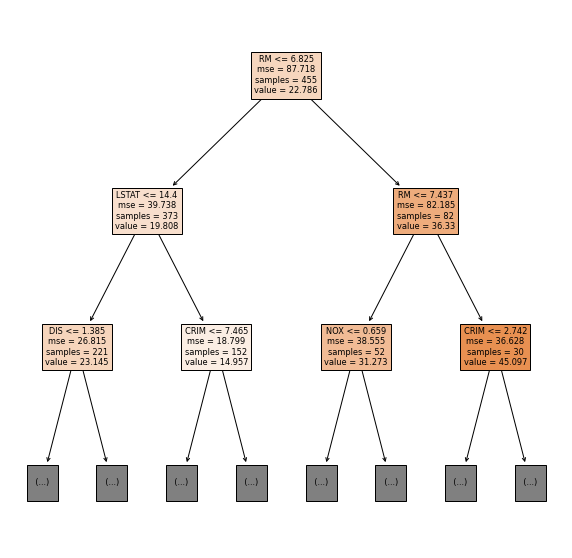

In [104]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(reg, feature_names=boston["feature_names"],
          filled=True, max_depth = 2) # 只印出2層, 但實際是五層, 方便閱讀用

In [105]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)


0.721453501360722